In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/Users/hightsierra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The slope $( m )$ and intercept $b$ for the regression line $y = mx + b$ can be computed using the formulas:

$m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$
      
$b = \bar{y} - m \bar{x}$
      
where $\bar{x}$ and $\bar{y}$ are the means of the $x$ and $y$ values respectively.

In [17]:
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0

    def fit(self, X, y):
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean)**2)

        self.m = numerator / denominator
        self.b = y_mean - self.m * x_mean

    def predict(self, X):
        return self.m * X + self.b

    def evaluate(self, y_true, y_pred):
        # compute mae
        mae = np.mean(np.abs(y_true - y_pred))
        
        # compute mse
        mse = np.mean((y_true - y_pred)**2)
        
        # compute r2
        sst = np.sum((y_true - np.mean(y_true))**2)
        sse = np.sum((y_true - y_pred)**2)
        r2 = 1 - (sse/sst)
        
        return mae, mse, r2

In [18]:
beers_df = pd.read_csv('../datasets/beers.csv')
beers_cleaned = beers_df.dropna(subset=['abv', 'ibu'])
X = beers_cleaned['abv'].values
y = beers_cleaned['ibu'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae, mse, r2 = model.evaluate(y_test, y_pred)

In [20]:
print(f"mae socre: {mae:.2f}")
print(f"mse score: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

Mean Absolute Error (MAE): 15.11
Mean Squared Error (MSE): 354.82
R-squared (R2): 0.48


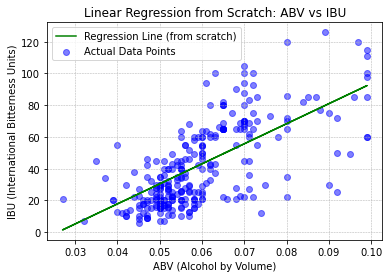

In [21]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data Points')
plt.plot(X_test, y_pred, color='green', label='Regression Line (from scratch)')
plt.title('Linear Regression from Scratch: ABV vs IBU')
plt.xlabel('ABV (Alcohol by Volume)')
plt.ylabel('IBU (International Bitterness Units)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression as sklLinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
X = beers_cleaned[['abv']]
y = beers_cleaned['ibu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = sklLinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mae socre: {mae:.2f}")
print(f"mse score: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

Mean Absolute Error (MAE): 15.11
Mean Squared Error (MSE): 354.82
R-squared (R2): 0.48


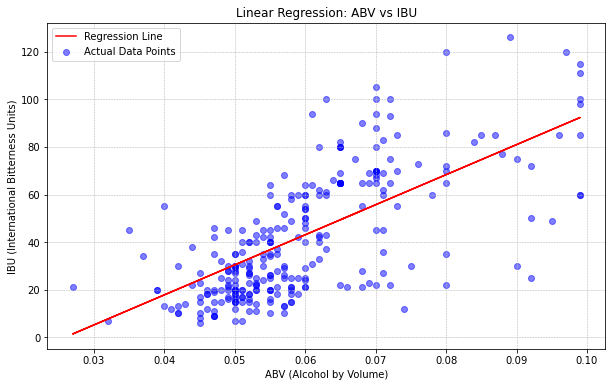

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('linear regression: ABV vs IBU')
plt.xlabel('ABV (Alcohol by Volume)')
plt.ylabel('IBU (International Bitterness Units)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()